In [0]:
%tensorflow_version 2.0.0

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.0.0`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [0]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())



[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 157350749527295270
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 16830325905300789242
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 11246941470116961202
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7470045594
locality {
  bus_id: 1
  links {
  }
}
incarnation: 10717897418227776421
physical_device_desc: "device: 0, name: Tesla P4, pci bus id: 0000:00:04.0, compute capability: 6.1"
]


In [0]:
#mount your own drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
#Getting all pip packages
import subprocess
import sys

reqs = subprocess.check_output([sys.executable, '-m', 'pip', 'freeze'])
installed_packages = [r.decode().split('==') for r in reqs.split()]


In [0]:
#installing tensorflow-datasets==2.1.0
if ['tensorflow-datasets', '2.1.0'] not in installed_packages:
  !pip uninstall tensorflow-datasets
  !pip install tensorflow-datasets 

In [0]:
!pip install tf-keras-vis

In [9]:
from tensorflow import keras

from tensorflow.keras.models import load_model

#%tensorflow_version 2.0
import tensorflow as tf

tf.keras.backend.clear_session()

import numpy as np
from scipy.optimize import minimize
from sklearn.utils import shuffle


from PIL import Image

from matplotlib import pyplot
import matplotlib.pylab as plt 
from scipy.signal import convolve2d
%matplotlib inline
plt.style.use('dark_background')

import os

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import AUC, Precision, Recall, FalsePositives, \
                                     FalseNegatives, TruePositives, TrueNegatives
from tensorflow.keras.preprocessing import image
from tensorflow.keras.regularizers import l2

In [10]:
from __future__ import absolute_import, division, print_function, unicode_literals
tf.keras.backend.clear_session()  # For easy reset of notebook state.
print(tf.__version__)  # You should see a > 2.0.0 here!
from tf_keras_vis.utils import print_gpus
print_gpus()

2.0.0
1 Physical GPUs, 1 Logical GPU


In [13]:
#import tensorflow_addons as tfa
import tensorflow_datasets as tfds

In [14]:
np.random.seed(109)
tf.random.set_seed(109)

In [17]:
import certifi
import urllib3  # For handling https certificate verification 
import scipy.ndimage as ndimage
import tensorflow_datasets as tfds
#import tensorflow_addons as tfa


# This line will download the CelebA dataset. The download will only happen the first time you ever run this cell.
train_celeb, test_celeb = tfds.load('celeb_a', split=['train', 'test'], shuffle_files=False, download=False) # data_dir = 'gdrive/My Drive/', 

* tf.data API neables you to build complex input ipelines from simple reusable pieces

* Aggregate data from different files; apply random perturbations to each image, merge randomly selected images

* tf.data API makes it possible to handle large amounts of data, read from different data formats and perform complex transformations.

* tf.data API introduces a tf.data.Dataset that represents a sequence of elements - consisting of 1 or more components

* e.g. Image pipeline - An element is a single example; Image and components are 2 tensor components

* to construct a dataset from data in memory use tf.data.Dataset.from_tensors() or tf.data.Dataset.from_tensor_slices().

* If input data is stored in a file in the recommended format use tf.data.TFRecordDataset().

* A dataset object so created is a Python iterable; its elements can be viewed using a for loop 

In [0]:
# create a datset object
dataset = tf.data.Dataset.from_tensor_slices(tf.random.uniform ([4,10], minval = 1, maxval = 10, dtype = tf.int32))

#view elements
for elem in dataset:
  print(elem)

tf.Tensor([4 3 1 9 7 4 8 9 4 6], shape=(10,), dtype=int32)
tf.Tensor([9 6 2 2 6 4 7 2 9 8], shape=(10,), dtype=int32)
tf.Tensor([5 7 5 4 8 5 6 4 8 4], shape=(10,), dtype=int32)
tf.Tensor([6 2 2 2 6 6 4 2 2 2], shape=(10,), dtype=int32)


* Datasets are powerful objects because they are effectively dictionaries.
* That can store tensors and other data such as the response variable.

We can also construct them by passing small sized numpy arrays, such as in the following example.

In [0]:
for elem in dataset:
  print(elem.numpy())

[4 3 1 9 7 4 8 9 4 6]
[9 6 2 2 6 4 7 2 9 8]
[5 7 5 4 8 5 6 4 8 4]
[6 2 2 2 6 6 4 2 2 2]


* Transform a dataset object into a new dataset by chaining method calls on the tf.data.Dataset object

* Dataset.map() - per element transformations

* Dataset.batch() - multi-element transformations

In [0]:
dataset = dataset.map(lambda x: x*2)

for elem in dataset:
  print(elem) # print elem.numpy()

tf.Tensor([ 8  6  2 18 14  8 16 18  8 12], shape=(10,), dtype=int32)
tf.Tensor([18 12  4  4 12  8 14  4 18 16], shape=(10,), dtype=int32)
tf.Tensor([10 14 10  8 16 10 12  8 16  8], shape=(10,), dtype=int32)
tf.Tensor([12  4  4  4 12 12  8  4  4  4], shape=(10,), dtype=int32)


In [0]:
# load mnist which is in numpy array
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train.shape, y_train.shape

11493376/11490434 [==============================] - 1s 0us/step


((60000, 28, 28), (60000,))

In [0]:
# take only 10 images
# take creates a dataset with max num of elements specified in the function
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).take(10)

In [0]:
len(list(train_dataset))

10

In [0]:
tf.data.experimental.cardinality(train_dataset).numpy()

10

In [0]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))

In [0]:
# Retreive images
for elem in train_dataset.take(1):
  print(elem[0].numpy().shape)
  # elem is a tuple of image and label
  # convert elem[0] to numpy array and then take shape

(28, 28)


(28, 28)


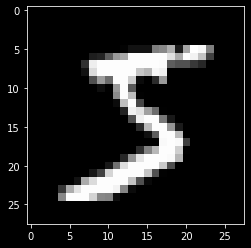

In [0]:
for elem in train_dataset.take(1):
  image = elem[0].numpy() # image as numpy array
  print(image.shape)
  plt.imshow(image, cmap = 'gray')

* Images and labels are now both passed as a single dataset object
* Dataset instance can be passed directly to the methods fit(), evaluate() and predict()

# Data Augmentation

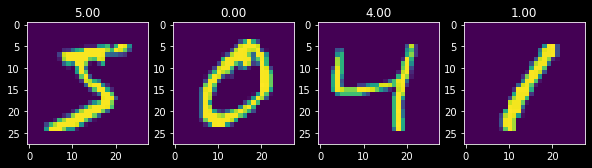

In [0]:
fig, axes = plt.subplots(1,4, figsize = (10,3))

for i, (img, label) in enumerate(train_dataset.take(4)):
  axes[i].imshow(img)
  axes[i].set_title(f'{label:.2f}') # :.2f for 2 decimals

(28, 28)

(28, 28, 1)

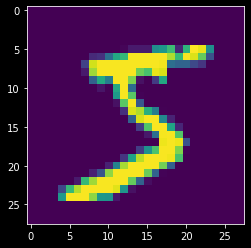

In [0]:
# elem is a tuple of image and label
# convert elem[0] to numpy array and then take shape
# by default image in elem[0] is stored as 2D array
# convert to 3D array for feeding to tensorflow functions  flip, rotate etc.
# convert backto 2D array for display using imshow()

plt.imshow(image)
display(image.shape)

image = np.expand_dims(image, axis = 2)
image.shape # convert to 3d tensor for feeding to image flip up, rotate, etc.

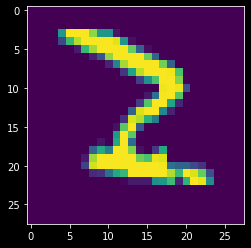

In [0]:
image_flip_up = tf.image.flip_up_down(image).numpy()
# .numpy() to process as numpy
plt.imshow(image_flip_up.reshape(28,-1))# convert back to 2D for display

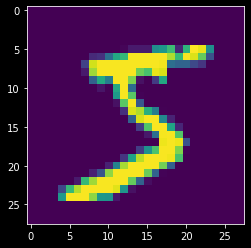

In [0]:

# expand_dims since image needs to be 3D
image_flip = tf.image.flip_up_down(np.expand_dims(image, axis = 1)).numpy()
image_rot_90 = tf.image.rot90(np.expand_dims(image, axis = 2), k=1).numpy()
# rot90 - rotates images counter-clockwise by 90 degrees
# k - number of times the image is rotated
plt.imshow(image_flip.reshape(28,-1))

* tf.data API is a set of utilities in TF2.0 for loading and preprocessing data.
* Can also use keras ImageDataGenerator; which accepts numpy arrays
* Rule
  * Numpy arrays if data is small and can fit in memory
  * tf.data.Datasets if data is large and cannot fit in memore

# TensorFlow Datasets
* TFDS is a collection of ready to use datasets
* Handles downloading and prepping of data and constructing a tf.data.Dataset
* TFDS is different from tf.data which is an API to build data pipelines
* Use tfds.load to build and load a tf.data.Dataset

## Street View House Numbers Dataset

* 600K images size 32*32
* Loading the .mat file creates 2 variables
* X - 4D matrix containing images
* Y - vector of class labels

In [20]:
train_svhn_cropped, test_svhn_cropped = tfds.load('svhn_cropped', split = ['train', 'test'], shuffle_files = False)


Shuffling and writing examples to /home/11372120/tensorflow_datasets/svhn_cropped/3.0.0.incompleteJY08OQ/svhn_cropped-train.tfrecord


Shuffling and writing examples to /home/11372120/tensorflow_datasets/svhn_cropped/3.0.0.incompleteJY08OQ/svhn_cropped-test.tfrecord


Shuffling and writing examples to /home/11372120/tensorflow_datasets/svhn_cropped/3.0.0.incompleteJY08OQ/svhn_cropped-extra.tfrecord


Dataset svhn_cropped downloaded and prepared to /home/11372120/tensorflow_datasets/svhn_cropped/3.0.0. Subsequent calls will reuse this data.


In [0]:
# check if downloaded dataset is a part of tf.data.Dataset
isinstance(train_svhn_cropped, tf.data.Dataset)

True

In [0]:
# convert to numpy if needed

features = next(iter(train_svhn_cropped))
display(type(features))
features.keys() # returns a dict with image and label as keys

dict

dict_keys(['image', 'label'])

In [0]:
list(features.items())[:2]

[('image', <tf.Tensor: shape=(32, 32, 3), dtype=uint8, numpy=
  array([[[126, 138, 136],
          [128, 138, 137],
          [129, 139, 138],
          ...,
          [ 19,  19,  19],
          [ 19,  21,  20],
          [ 19,  21,  20]],
  
         [[127, 139, 137],
          [127, 139, 137],
          [129, 140, 138],
          ...,
          [ 19,  21,  20],
          [ 19,  21,  20],
          [ 17,  21,  20]],
  
         [[128, 140, 139],
          [127, 139, 138],
          [128, 138, 137],
          ...,
          [ 19,  21,  20],
          [ 20,  22,  21],
          [ 17,  21,  20]],
  
         ...,
  
         [[ 91,  89,  96],
          [ 76,  75,  83],
          [ 69,  68,  77],
          ...,
          [ 94,  96,  91],
          [ 68,  70,  65],
          [ 43,  45,  42]],
  
         [[ 81,  78,  87],
          [ 70,  68,  78],
          [ 66,  65,  76],
          ...,
          [ 99, 100,  95],
          [ 73,  75,  70],
          [ 48,  48,  46]],
  
         [[ 73, 

In [0]:
# convert elements to numpy if needed
images = features['image'].numpy()
labels = features['label'].numpy()
images.shape, labels.shape


((32, 32, 3), ())

In [0]:
for i, element in enumerate(train_svhn_cropped):
  image = element['image']
  label = element['label']
  print(label)
  #print(element) # returns full numpy array
  break

tf.Tensor(4, shape=(), dtype=int64)


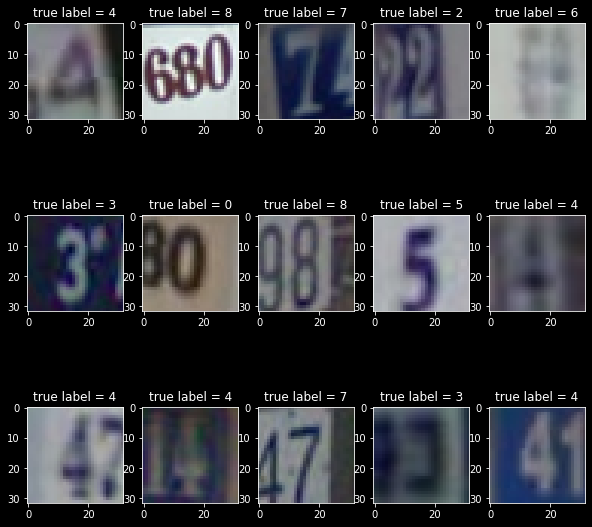

In [0]:
# Dataset can be divided into batches
# batch_size defines size of the batch
# each batch has images and labels
# take_size - define number of batches

batch_size = 5
take_size = 3

# Plot
# dfine subplot of range take_size and batch_size - 3 rows and 5 columns
fig, axes = plt.subplots(take_size, batch_size, figsize = (10,10))

# for each of the batch_size(3) * take_size(5) = 15 elements
for i, elem in enumerate(train_svhn_cropped.batch(batch_size).take(take_size)):
  for j in range(batch_size):
    # for each of the elements in 1 batch
    image = elem['image'][j]
    label = elem['label'][j]
    axes[i][j].imshow(image) # show image & label a specified location
    axes[i][j].set_title(f'true label = {label:d}')


* Convert from a collection of diectionaries to a collection of tuples

In [0]:
# Process the image

def normalize_image(img):
  # cast a tensor to a new type
  return(tf.cast(img, tf.float32)/255.)

def normalize_dataset(element):
  img = element['image']
  lbl = element['label']
  return normalize_image(img), lbl

In [0]:
train_svhn = train_svhn_cropped.map(normalize_dataset)
test_svhn = test_svhn_cropped.map(normalize_dataset)

In [0]:
isinstance(train_svhn, tf.data.Dataset)

True

## CNN Model for SVHN Dataset

In [0]:
n_filters = 16
input_shape = (32, 32, 3)

svhn_model = Sequential() 
svhn_model.add(Conv2D(n_filters, (3, 3), activation='relu', input_shape=input_shape))
svhn_model.add(MaxPooling2D((2, 2)))
svhn_model.add(Conv2D(n_filters*2, (3, 3), activation='relu')) 
svhn_model.add(MaxPooling2D((2, 2)))
svhn_model.add(Conv2D(n_filters*4, (3, 3), activation='relu'))
svhn_model.add(Flatten())
svhn_model.add(Dense(n_filters*2, activation='relu'))
svhn_model.add(Dense(10, activation='softmax'))
svhn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          18496     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                3

In [0]:
loss = 'sparse_categorical_crossentropy' # we use this because we did not 1-hot encode the labels
optimaz = Adam(lr=0.001)
metrics = ['accuracy'] 

# Compile model
svhn_model.compile(optimizer=optimaz,
                   loss=loss,
                   metrics=metrics)

In [0]:
# Fit with early stopping

%%time

batch_size = 64
epochs = 10

callbacks = [keras.callbacks.EarlyStopping(
    # stop training when val_accuracy is no longer improving
    monitor = 'val_accuracy',
    patience = 2,
    verbose = 1)]

CPU times: user 28 µs, sys: 3 µs, total: 31 µs
Wall time: 36.7 µs


In [0]:
history = svhn_model.fit(train_svhn.batch(batch_size), #.take(50), # change 50 only
                         epochs=epochs,
                         callbacks=callbacks,
                         validation_data=test_svhn.batch(batch_size)) #.take(50))

Epoch 1/10
1145/1145 [==============================] - 44s 38ms/step - loss: 1.1345 - accuracy: 0.6324 - val_loss: 0.7842 - val_accuracy: 0.7668
Epoch 2/10
1145/1145 [==============================] - 38s 33ms/step - loss: 0.5510 - accuracy: 0.8405 - val_loss: 0.5931 - val_accuracy: 0.8307
Epoch 3/10
1145/1145 [==============================] - 37s 32ms/step - loss: 0.4641 - accuracy: 0.8648 - val_loss: 0.4944 - val_accuracy: 0.8607
Epoch 4/10
1145/1145 [==============================] - 36s 32ms/step - loss: 0.4133 - accuracy: 0.8804 - val_loss: 0.4532 - val_accuracy: 0.8721
Epoch 5/10
1145/1145 [==============================] - 37s 32ms/step - loss: 0.3774 - accuracy: 0.8907 - val_loss: 0.4445 - val_accuracy: 0.8754
Epoch 6/10
1145/1145 [==============================] - 37s 32ms/step - loss: 0.3525 - accuracy: 0.8978 - val_loss: 0.4326 - val_accuracy: 0.8796
Epoch 7/10
1145/1145 [==============================] - 37s 32ms/step - loss: 0.3336 - accuracy: 0.9029 - val_loss: 0.4219 -

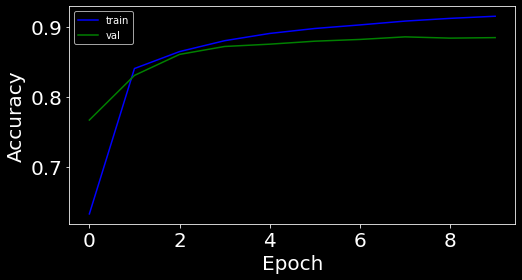

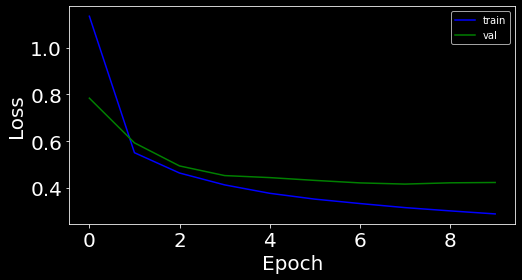

In [0]:
def print_history(history):
    fig, ax = plt.subplots(1, 1, figsize=(8,4))
    ax.plot((history.history['accuracy']), 'b', label='train')
    ax.plot((history.history['val_accuracy']), 'g' ,label='val')
    ax.set_xlabel(r'Epoch', fontsize=20)
    ax.set_ylabel(r'Accuracy', fontsize=20)
    ax.legend()
    ax.tick_params(labelsize=20)
    fig, ax = plt.subplots(1, 1, figsize=(8,4))
    ax.plot((history.history['loss']), 'b', label='train')
    ax.plot((history.history['val_loss']), 'g' ,label='val')
    ax.set_xlabel(r'Epoch', fontsize=20)
    ax.set_ylabel(r'Loss', fontsize=20)
    ax.legend()
    ax.tick_params(labelsize=20)
    plt.show();
    
print_history(history)

In [0]:
# Fit with high learning rate
loss = 'sparse_categorical_crossentropy'
optimizer = Adam(lr=0.5) # really big learning rate
metrics = ['accuracy'] 

# Compile model
svhn_model.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics)

In [0]:
%%time
batch_size = 64
epochs=10

history = svhn_model.fit(train_svhn.batch(batch_size), #.take(50), # change 50 to see the difference
                         epochs=epochs,
                         validation_data=test_svhn.batch(batch_size)) #.take(50))

Epoch 1/10
1145/1145 [==============================] - 41s 36ms/step - loss: 2763.3223 - accuracy: 0.1717 - val_loss: 2.2666 - val_accuracy: 0.1594
Epoch 2/10
1145/1145 [==============================] - 47s 41ms/step - loss: 2.2752 - accuracy: 0.1712 - val_loss: 2.2663 - val_accuracy: 0.1594
Epoch 3/10
1145/1145 [==============================] - 38s 33ms/step - loss: 2.2754 - accuracy: 0.1709 - val_loss: 2.2662 - val_accuracy: 0.1594
Epoch 4/10
1145/1145 [==============================] - 38s 33ms/step - loss: 2.2754 - accuracy: 0.1709 - val_loss: 2.2662 - val_accuracy: 0.1594
Epoch 5/10
1145/1145 [==============================] - 38s 33ms/step - loss: 2.2754 - accuracy: 0.1712 - val_loss: 2.2662 - val_accuracy: 0.1594
Epoch 6/10
1145/1145 [==============================] - 39s 34ms/step - loss: 2.2754 - accuracy: 0.1712 - val_loss: 2.2662 - val_accuracy: 0.1594
Epoch 7/10
1145/1145 [==============================] - 39s 34ms/step - loss: 2.2754 - accuracy: 0.1712 - val_loss: 2.266